In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [3]:
# Get or Create a Dataset
X, y = make_regression(n_samples = 10000, n_features = 20, n_informative = 20, noise = 10, random_state = 1)

# Normalize
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X-u)/std

In [4]:
# Add column of ls for vectorization
ones = np.ones((X.shape[0],1))
X = np.hstack((ones, X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [5]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X,y, theta): # Cost function
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y - y_)**2)
    return e/m

def gradient(X,y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T,(y_ - y ))
    m = X.shape[0]
    return grad/m

#BATCH GRADIENT DESCENT 
def gradient_descent(X,y, lr = 0.01, max_itrs = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_itrs):
        e = error(X,y, theta)
        error_list.append(e)
        # batch gradient descent -> Compute the gradient ert to entire dataset
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
        
    return theta, error_list

In [39]:
"""
batch_size = m then it is regular gradient descent
batch_size = 200 or something, then it is schotastic batch gradient
"""

def batch_gradient_descent(X,y, batch_size = 20, lr = 0.01, max_itrs = 10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1)))
    
    
    for i in range(max_itrs):

        #Mini batch gradient descent => Compute the gradient ert to entire dataset
         
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m // batch_size
        
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i+1)*batch_size, :]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:, -1]
            
            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - lr*batch_gradient
            e = error(x_batch, y_batch, theta)
            error_list.append(e)
                              
        
    return theta, error_list
        

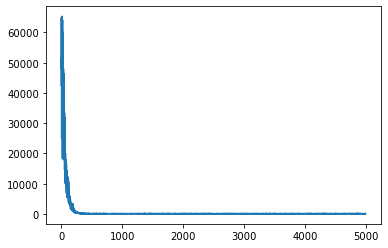

In [40]:
# Mini batch gradient Descent
theta, el = batch_gradient_descent(X,y)
plt.figure()
plt.plot(np.arange(len(el)), el)
plt.show()

264.08329543338743


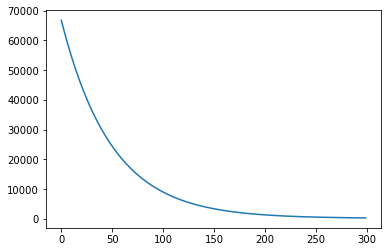

In [38]:
# Conventional gradient Descent
theta, el = gradient_descent(X,y)
final_error = el[-1]

plt.figure()
plt.plot(np.arange(len(el)), el)
print(final_error)
plt.show()